# Introduction to atomman: Stroh class

__Lucas M. Hale__, [lucas.hale@nist.gov](mailto:lucas.hale@nist.gov?Subject=ipr-demo), _Materials Science and Engineering Division, NIST_.

Notebook last updated: 2018-04-05
    
[Disclaimers](http://www.nist.gov/public_affairs/disclaimer.cfm) 

## 1. Introduction

This Notebook provides an introduction to the atomman.defect.Stroh class that computes elastic solutions for the Eshelby anisotropic straight dislocation or crack using the Stroh method.

**Library Imports**

In [1]:
# Standard libraries
from __future__ import (absolute_import, print_function,
                        division, unicode_literals)
import os

# http://www.numpy.org/
import numpy as np             

import matplotlib.pyplot as plt
%matplotlib inline

# https://github.com/usnistgov/atomman
import atomman as am
import atomman.unitconvert as uc

## 2. Underlying theory of Stroh method

Starting with the fundamental equations of elasticity:

$$ \sigma_{ij} = C_{ijkl} \epsilon_{kl} $$

$$ \epsilon_{ij} = \frac{1}{2} \left(\frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i}\right) $$

$$ \frac{\partial \sigma_{ij}}{\partial x_j} = 0 $$

Combining these and taking the solution to be independent of $x_3$ generates the partial differential equation:

$$ C_{ijkl} \frac{ \partial^2 u_k}{\partial x_j \partial x_l} = 0 $$

Solutions of the partial differential equation are of the form 

$$ u_k = A_k f(x_1 + p x_2) $$

Values of $A_k$ and $p$ can be found by solving

$$ \left[C_{i1k1} + \left(C_{i1k2} + C_{i2k1} \right) p + C_{i2k2} p^2 \right] A_k = 0 $$

The determinate expression is a sixth-order polynomial expression resulting in six complex roots, $p_\alpha$ with $\alpha$ ranging 1 to 6. There is also one $A_{k \alpha}$ corresponding to each root.

With the Stroh method for solving the problem, another vector, $L_i$ is defined for each $\alpha$ root as

$$ L_{i \alpha} = \left(C_{i2k1} + p_{\alpha} C_{i2k2} \right) A_{k \alpha} $$

and a normalization factor, $k_{\alpha}$, as

$$ k_{\alpha} = \frac{1}{2 A_{j \alpha} L_{j \alpha}} $$

Stroh's method is then to write the problem as an eigenvector problem, which solving gives values for $p_{\alpha}$, $A_{i \alpha}$, and $L_{i \alpha}$.

## 3. Initialize/solve

A solution is found using the Stroh method when either an instance of the object is initialized or when the solve() method is called. The same parameters are taken in both cases. 

Parameters

- **C** (*atomman.ElasticConstants*) The medium's elastic constants.

- **burgers** (*array-like object*) The dislocation's Cartesian Burgers vector.

- **axes** (*array-like object, optional*) 3x3 set of rotational axes for the system. If given, C and burgers will be transformed using axes.

- **m** (*array-like object, optional*) The m Cartesian unit vector for the solution giving the $x_1$ direction.  m, n, and $\xi$ (dislocation line direction) should be right-hand orthogonal.  Default value is [1,0,0] (Cartesian x-axis).

- **n** (*array-like object, optional*) The n Cartesian unit vector for the solution giving the $x_2$ direction.  m, n, and $\xi$ (dislocation line direction) should be right-hand orthogonal.  Default value is [0,1,0] (Cartesian y-axis).

- **tol** (*float*) Tolerance parameter used to round off near-zero values.  Default value is 1e-8.

**Notes on orientation:** The default m and n values correspond to the theory in Section #2 where the dislocation line is along the z-axis and the slip plane is normal to the y-axis.  See Section #6 for discussion on more general cases.

In [2]:
# 0 K values for Al
alat = uc.set_in_units(4.05, 'angstrom')
C11 = uc.set_in_units(1.143e12, 'dyn/cm^2')
C12 = uc.set_in_units(0.619e12, 'dyn/cm^2')
C44 = uc.set_in_units(0.316e12, 'dyn/cm^2')

# Build ElasticConstants object (standard crystal reference)
C = am.ElasticConstants(C11=C11, C12=C12, C44=C44)

# Define Burgers vector (Cartesian, but wrt standard crystal reference)
burgers = alat / 2 * np.array([1, 0, -1])

# Define system orientation axes for edge dislocation:
# Burgers vector along x-axis
xaxis = [ 1, 0,-1]
# Slip plane normal to y-axis
yaxis = [ 1, 1, 1]
# Line direction along z-axis
zaxis = [ 1,-2, 1]

# Solve Stroh method for conditions
stroh = am.defect.Stroh(C, burgers, axes=[xaxis, yaxis, zaxis])

Values for the solution parameters p, A, L, and k described in Section #2 can be checked as attributes of the class instance.

In [3]:
print('stroh.p ->')
print(stroh.p)
print()

print('stroh.A ->')
print(stroh.A)
print()

print('stroh.L ->')
print(stroh.L)
print()

print('stroh.k ->')
print(stroh.L)
print()

stroh.p ->
[ -1.35127492e-17+0.72418397j  -1.35127492e-17-0.72418397j
  -4.44089210e-16+1.22646367j  -4.44089210e-16-1.22646367j
   6.66133815e-16+1.14839554j   6.66133815e-16-1.14839554j]

stroh.A ->
[[ -2.16172806e-18 -4.59984801e-01j   7.87367005e-01 +0.00000000e+00j
    2.44796357e-01 +3.11522467e-16j]
 [ -2.16172806e-18 +4.59984801e-01j   7.87367005e-01 -0.00000000e+00j
    2.44796357e-01 -3.11522467e-16j]
 [  6.86766687e-01 +0.00000000e+00j   3.40411524e-16 +4.77037014e-01j
   -1.30061712e-15 -4.46713376e-01j]
 [  6.86766687e-01 -0.00000000e+00j   3.40411524e-16 -4.77037014e-01j
   -1.30061712e-15 +4.46713376e-01j]
 [  2.51360646e-15 +5.72170071e-01j  -4.40891319e-01 +1.61962265e-15j
    6.26880680e-01 +0.00000000e+00j]
 [  2.51360646e-15 -5.72170071e-01j  -4.40891319e-01 -1.61962265e-15j
    6.26880680e-01 -0.00000000e+00j]]

stroh.L ->
[[ -1.91928332e-01 +4.22033318e-18j  -1.16080832e-18 -2.65027039e-01j
    2.34534900e-17 -3.82898052e-02j]
 [ -1.91928332e-01 -4.22033318e-18j  

## 4. Derived properties

Different properties of the solution can be derived from the solution parameters and obtained as other attributes of the class.

### 4.1 Energy coefficient tensor, K_tensor

The energy coefficient tensor is a property of the solution that is useful for dislocation stress and energy calculations. It only depends on the elastic constants and the orientation.

The tensor can be obtained from the solution parameters as

$$ K_{jl} = i \sum_{\alpha} \pm k_{\alpha} L_{j \alpha} L_{l \alpha} $$

where $i$ is the imaginary unit and the $\pm$ sense alternates for even/odd values of $\alpha$ (the six partial solutions are three pairs of complex conjugates).

**Note** $K_{ij}$ can vary between different definitions by including different multiplicative factors. Here, it is taken such that in the isotropic case it relates to the shear modulus, $\mu$, and Poisson's ratio, $\nu$, by

- $K_{11}^{iso} = K_{22}^{iso} = K_{edge}^{iso} = \frac{\mu}{1 - \nu}$

- $K_{33}^{iso} = K_{screw}^{iso} = \mu$

In [4]:
print('stroh.K_tensor (in GPa) ->')
print(uc.get_in_units(stroh.K_tensor, 'GPa'))

stroh.K_tensor (in GPa) ->
[[ 44.16096695   0.           0.        ]
 [  0.          44.47363325  -0.81698962]
 [  0.          -0.81698962  28.80033839]]


### 4.2 Energy coefficient, K_coeff

The energy coefficient, $K$, is a dislocation-specific coefficient found in expressions for a dislocation's self-energy

$$\frac{W}{l} = \frac{K b^2}{4 \pi} \ln{ \left( \frac{R}{r_0} \right)}, $$

where $b$ is the magnitude of $b_i$, and $r_0$ and $R$ are the inner and outer radii of a cylindircal ring around the dislocation. The energy coefficient can be computed from the energy coefficent tensor and burgers vector

$$ K = \frac{b_i K_{ij} b_j} {b_k b_k} $$



In [5]:
# Note that K_coeff here is K_11 above as b_i is || to x-axis
print('stroh.K_coeff (in GPa) ->')
print(uc.get_in_units(stroh.K_coeff, 'GPa'))

stroh.K_coeff (in GPa) ->
44.1609669476


### 4.3 Pre-logarithmic factor, preln

Alternatively, the self-energy expression can be represented as

$$\frac{W}{l} = a \ln{ \left( \frac{R}{r_0} \right)}, $$

where $a$ is referred to as the pre-logarithmic energy factor. Related to $K$ and $K_{ij}$,

$$ a = \frac{b_i K_{ij} b_j}{4 \pi} = \frac{K b^2}{4 \pi} $$

In [6]:
# preln is considered in units of energy/length
print('stroh.preln (in eV/Å) ->')
print(uc.get_in_units(stroh.preln, 'eV/Å'))

stroh.preln (in eV/Å) ->
0.17988642292


## 5. Position-dependent calculations

### 5.1. Setup

#### Create an fcc Al demonstration unit cell

In [7]:
alat = uc.set_in_units(4.05, 'Å')
box = am.Box(a=alat, b=alat, c=alat)

atoms = am.Atoms(pos=[[0.0,0.0,0.0], [0.5,0.5,0.0], [0.5,0.0,0.5], [0.0,0.5,0.5]])

ucell = am.System(box=box,
                  atoms=atoms, 
                  scale=True)
print(ucell)

avect =  [ 4.050,  0.000,  0.000]
bvect =  [ 0.000,  4.050,  0.000]
cvect =  [ 0.000,  0.000,  4.050]
origin = [ 0.000,  0.000,  0.000]
natoms = 4
natypes = 1
symbols = (None,)
pbc = [ True  True  True]
     id |   atype |  pos[0] |  pos[1] |  pos[2]
      0 |       1 |   0.000 |   0.000 |   0.000
      1 |       1 |   2.025 |   2.025 |   0.000
      2 |       1 |   2.025 |   0.000 |   2.025
      3 |       1 |   0.000 |   2.025 |   2.025


#### Use ucell to generate system

In [8]:
# Create system by rotating ucell to coincide with dislocation solution
system = ucell.rotate([xaxis, yaxis, zaxis])

# Shift all atomic positions so x=0 and y=0 are between atomic planes
system.atoms.pos += alat * np.array([2**0.5 / 8, 3**0.5 / 6, 0.0])
system.wrap()

# Note equal +- mults along avect, bvect directions
system = system.supersize((-3,3), (-3,3), 1)

print('system.natoms ->', system.natoms)

system.natoms -> 864


### 5.2 eta coordinates

The position-dependence of the displacements and stresses are handled using $\eta$ coordinates defined as (based on Section #2)

$$ \eta_{\alpha} = x_1 + p_{\alpha} x_2 $$

In [9]:
# Compute eta for test position [1, 2, 3]
print('stroh.eta([1,2,3]) (in Å) ->')
print(uc.get_in_units(stroh.eta([1,2,3]), 'Å'))

stroh.eta([1,2,3]) (in Å) ->
[[ 1.+1.44836793j  1.-1.44836793j  1.+2.45292734j  1.-2.45292734j
   1.+2.29679109j  1.-2.29679109j]]


### 5.3 displacement

The displacements associated with the elastic solution can be calculated as

$$ u_j = \frac{1}{2 \pi i} \sum_{\alpha}  \pm k_{\alpha} A_{j \alpha} (L_{l \alpha} b_l) \ln{\eta_{\alpha}} $$

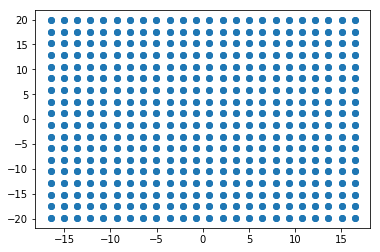

In [10]:
# plot original positions of atoms in system
plt.plot(system.atoms.pos[:, 0], system.atoms.pos[:, 1], 'o')
plt.show()

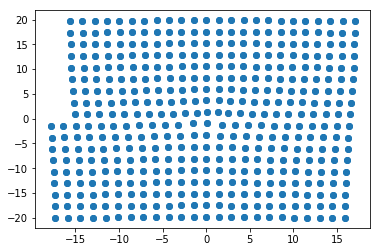

In [11]:
# Compute displacements for all positions
disp = stroh.displacement(system.atoms.pos)

# Apply displacements to positions
system.atoms.pos += disp

# plot new positions of atoms in system
plt.plot(system.atoms.pos[:, 0], system.atoms.pos[:, 1], 'o')
plt.show()

### 5.3 stress

The elastic stress state at a given position can be calculated as

$$ \sigma_{ij} = \frac{1}{2 \pi i} \sum_{\alpha}  \pm k_{\alpha} C_{ijkl}[m_l + p_{\alpha} n_l] A_{k \alpha} (L_{m \alpha} b_m) \frac{1}{\eta_{\alpha}} $$

In [12]:
# Calculate stress state at each atomic position
system.atoms.stress = stroh.stress(system.atoms.pos)

stress_11:


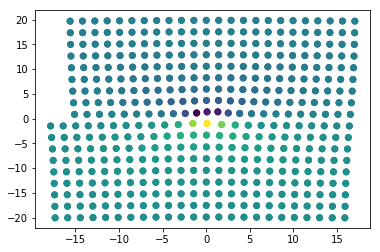

stress_22:


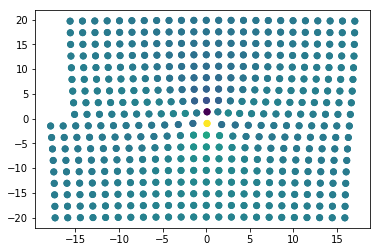

stress_33:


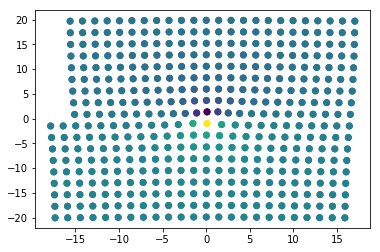

stress_12:


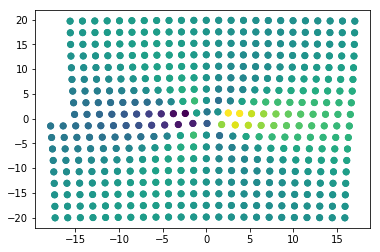

stress_13:


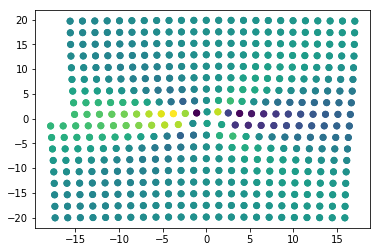

stress_23:


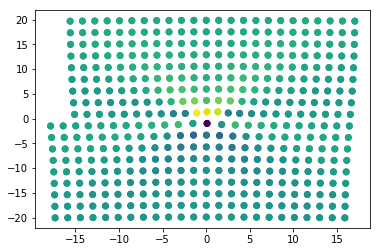

In [13]:
# Dirty plots of stress components
print('stress_11:')
plt.scatter(system.atoms.pos[:, 0], system.atoms.pos[:, 1], c=system.atoms.stress[:, 0, 0])
plt.show()

print('stress_22:')
plt.scatter(system.atoms.pos[:, 0], system.atoms.pos[:, 1], c=system.atoms.stress[:, 1, 1])
plt.show()

print('stress_33:')
plt.scatter(system.atoms.pos[:, 0], system.atoms.pos[:, 1], c=system.atoms.stress[:, 2, 2])
plt.show()

print('stress_12:')
plt.scatter(system.atoms.pos[:, 0], system.atoms.pos[:, 1], c=system.atoms.stress[:, 0, 1])
plt.show()

print('stress_13:')
plt.scatter(system.atoms.pos[:, 0], system.atoms.pos[:, 1], c=system.atoms.stress[:, 0, 2])
plt.show()

print('stress_23:')
plt.scatter(system.atoms.pos[:, 0], system.atoms.pos[:, 1], c=system.atoms.stress[:, 1, 2])
plt.show()

## 6. General case considerations

Properly building atomistic systems with dislocations using the Stroh method requires careful considerations regarding the system orientation.  This is complicated by the need to think in terms of multiple axes systems

- $[hkl]$ crystal vectors are commonly used to define dislocation types and slip planes.  These vectors are taken relative to the box vectors of a unit cell in a standard reference frame.

- The atomistic system's orientation is defined by specifying $[hkl]$ crystal vectors to coincide with the system's $a_i$, $b_i$, $c_i$ box vectors.

- The atomic positions within the atomistic system are represented with Cartesian $x'_i$ coordinates.

- The elastic solution is defined for Cartesian $x_i$ coordinates, where $x_2$ is normal to the slip plane and $x_3$ is parallel to the dislocation line.

As the latter two are both Cartesian, $x_i$ values are easily obtained from $x'_i$ using transformation unit vectors $m_i$ and $n_i$

- $x_1 = m_i x'_i$

- $x_2 = n_i x'_i$

- $x_3$ values not needed as the elastic solution is invariant in that direction.

Depending on the crystal structure and dislocation type, it is not always possible to construct a system with orthogonal box vectors.  This means that the $a_i$, $b_i$, $c_i$ box vectors will not necessarily align with the $x'_i$ axes.  For this general case, the following requirements and choices can help with orientation decisions

- The dislocation's line direction must be parallel to one of the box vectors for the dislocation to remain infinitely straight.

- For convenience, each of the elastic solution's $x_i$-axes should map to one of the atomic system's $x'_i$-axes.  This is accomplished if both the dislocation line and the slip plane normal are oriented along $x'_i$-axes.

With LAMMPS-compatible system boxes

- The $a_i$ box vector is always aligned with the $x'_1$-axis, therefore the dislocation line should be parallel to the $a_i$ vector / $x'_1$-axis.

- The $a_i$ and $b_i$ box vectors have no component in the $x'_3$ direction, i.e. the plane containing both $a_i$ and $b_i$ is normal to the $x'_3$-axis.  The slip plane normal can then be taken as parallel to the $x'_3$-axis.

- Related to the elastic solution, this makes $x_1$ parallel to the $x'_2$-axis, $x_2$ parallel to the $x'_3$-axis, and $x_3$ parallel to the $x'_1$-axis. The corresponding $m_i$ and $n_i$ values are

    - $m_i = [0, 1, 0]$
    
    - $n_i = [0, 0, 1]$

Redefine earlier problem, but in LAMMPS-preferred setting for general dislocations

In [14]:
# Use generic LAMMPS m,n vectors
m=[0,1,0]
n=[0,0,1]

# Define system orientation axes for edge dislocation:
# Line direction along x-axis
xaxis = [ 1,-2, 1]
# Burgers vector along y-axis
yaxis = [ 1, 0,-1]
# Slip plane normal to z-axis
zaxis = [ 1, 1, 1]

# Solve Stroh method for conditions
stroh = am.defect.Stroh(C, burgers, axes=[xaxis, yaxis, zaxis], m=m, n=n)

Check that derived values are consistent (K_tensor rotated)

In [15]:
print('stroh.K_tensor (in GPa) ->')
print(uc.get_in_units(stroh.K_tensor, 'GPa'))
print()

print('stroh.K_coeff (in GPa) ->')
print(uc.get_in_units(stroh.K_coeff, 'GPa'))
print()

# preln is considered in units of energy/length
print('stroh.preln (in eV/Å) ->')
print(uc.get_in_units(stroh.preln, 'eV/Å'))

stroh.K_tensor (in GPa) ->
[[ 28.80033839   0.          -0.81698962]
 [  0.          44.16096695   0.        ]
 [ -0.81698962   0.          44.47363325]]

stroh.K_coeff (in GPa) ->
44.1609669476

stroh.preln (in eV/Å) ->
0.179886422921


Generate an atomic system that is properly rotated as well

In [16]:
# Create system by rotating ucell to coincide with dislocation solution
system = ucell.rotate([xaxis, yaxis, zaxis])

# Shift all atomic positions so y=0 and z=0 are between atomic planes
system.atoms.pos += alat * np.array([0.0, 2**0.5 / 8, 3**0.5 / 6])
system.wrap()

# Note equal +- mults along avect, bvect directions
system = system.supersize(1, (-3,3), (-3,3))

print('system.natoms ->', system.natoms)

system.natoms -> 864


Show that resulting displacements are the same as above, just with plotting y, z coordinates instead of x, y coordinates.

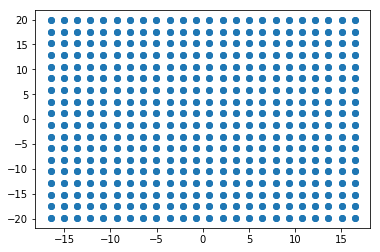

In [17]:
# plot original positions of atoms in system
plt.plot(system.atoms.pos[:, 1], system.atoms.pos[:, 2], 'o')
plt.show()

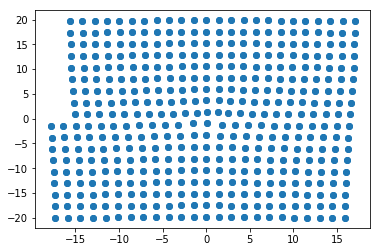

In [18]:
# Compute displacements for all positions
disp = stroh.displacement(system.atoms.pos)

# Apply displacements to positions
system.atoms.pos += disp

# plot new positions of atoms in system
plt.plot(system.atoms.pos[:, 1], system.atoms.pos[:, 2], 'o')
plt.show()